# Logistic Regression Implementation from Scratch

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

#### Read data and put into variables

In [3]:
X=pd.read_csv('LogisticX.csv').values
X.shape

(100, 2)

In [4]:
y=pd.read_csv('LogisticY.csv').values
y.shape

(100, 1)

In [5]:
y = y.reshape(-1, 1)

In [6]:
X

array([[3.8915, 4.2105],
       [3.6898, 6.6051],
       [2.7763, 7.5057],
       [3.1137, 5.7724],
       [2.9251, 5.4315],
       [3.6699, 6.4406],
       [2.8404, 3.8136],
       [3.7729, 5.2398],
       [2.6465, 3.4946],
       [4.0902, 5.9298],
       [3.3337, 5.5294],
       [1.44  , 5.8302],
       [3.6919, 5.0708],
       [4.4506, 3.629 ],
       [4.7716, 6.4982],
       [3.7306, 4.8439],
       [4.9867, 5.6805],
       [4.1954, 6.455 ],
       [5.6164, 6.0755],
       [3.7672, 4.6705],
       [3.982 , 5.2395],
       [3.9381, 5.2835],
       [4.0603, 6.4953],
       [4.3357, 6.7917],
       [4.5707, 4.4346],
       [2.5098, 4.4806],
       [2.2003, 5.6314],
       [4.8419, 5.4988],
       [4.4708, 5.7022],
       [2.6502, 4.4475],
       [3.4506, 4.1548],
       [5.3572, 5.4207],
       [2.3391, 6.7416],
       [3.8305, 6.1357],
       [2.1096, 5.3812],
       [3.674 , 5.1154],
       [3.8091, 4.3737],
       [3.3172, 6.4038],
       [4.4469, 6.3588],
       [3.3633, 5.3338],


In [7]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

### Train Test split function to split data into traning data and testing data

In [9]:
def train_test_split(X, y, test_size=0.2):
    if isinstance(test_size, float):
        test_size = round(test_size * len(X))
    
    indices = np.arange(X.shape[0])  
    test_indices = random.sample(indices.tolist(), k=test_size)  
    train_indices = list(set(indices) - set(test_indices))  
    
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

### Class LogisticRegression for implementation of Logistic Regression

In [11]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        m = len(y)
        h = self.sigmoid(X @ self.theta)
        cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def gradient_descent(self, X, y):
        m = len(y)
        self.theta = np.zeros((X.shape[1], 1))
        cost_history = []
        for _ in range(self.iterations):
            self.theta -= (self.learning_rate/m) * X.T @ (self.sigmoid(X @ self.theta) - y)
            cost_history.append(self.compute_cost(X, y))
        return cost_history

    def fit(self, X, y):
        return self.gradient_descent(X, y)

    def predict(self, X):
        return (self.sigmoid(X @ self.theta) >= 0.5).astype(int)

    def plot_cost_function(self, cost_history, label):
        plt.plot(range(len(cost_history)), cost_history, label=label)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost Function vs Iterations')
        plt.legend()
        plt.show()

    def plot_decision_boundary(self, X, y):
        # Define grid range
        x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))
    
        # Predict on the grid
        grid = np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()]
        Z = self.predict(grid).reshape(xx.shape)
    
        # Plot decision boundary using contour plot
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
        
        # Overlay training points (but not as scatter)
        class_0 = X[y.flatten() == 0]
        class_1 = X[y.flatten() == 1]
        
        plt.plot(class_0[:, 1], class_0[:, 2], 'ro', label='Class 0')  # Red circles
        plt.plot(class_1[:, 1], class_1[:, 2], 'bx', label='Class 1')  # Blue Xs
    
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Decision Boundary')
        plt.legend()
        plt.show()

    def compute_metrics(self, y_true, y_pred):
        tp = np.sum((y_true == 1) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
    
        confusion_matrix = np.array([[tn, fp], [fn, tp]])  # Include confusion matrix
    
        accuracy = (tp + tn) / len(y_true)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
        return confusion_matrix, accuracy, precision, recall, f1_score



##### Normalize Features

In [13]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

##### Add intercept Term

In [15]:
X = np.hstack([np.ones((X.shape[0], 1)), X])

##### Split data into test data and train data 

In [17]:
random.seed(0)
x_train,x_test,y_train,y_test = train_test_split(X,y,0.2)

#####  Train logistic regression model with learning rate 0.1 and Plot cost function

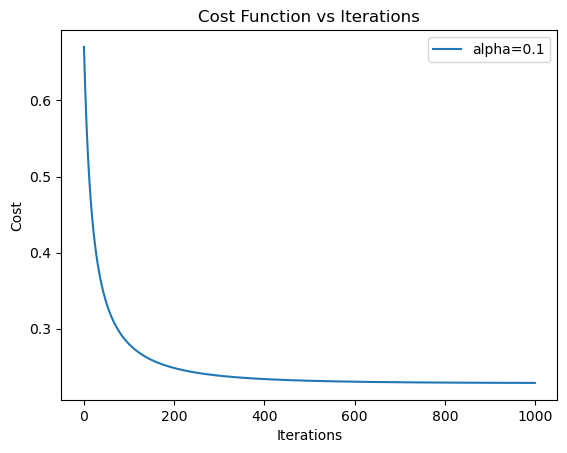

In [19]:
log_reg_01 = LogisticRegression(learning_rate=0.1, iterations=1000)
cost_history_01 = log_reg_01.fit(x_train, y_train)

log_reg_01.plot_cost_function(cost_history_01, label='alpha=0.1')


In [20]:
# Print final cost and learned parameters
final_cost = cost_history_01[-1]
final_theta = log_reg_01.theta

print(f'Final Cost Function Value: {final_cost:.6f}')
print(f'Learned Parameters (Theta):\n{final_theta}')

Final Cost Function Value: 0.228690
Learned Parameters (Theta):
[[ 0.09878729]
 [ 2.40876717]
 [-2.34183032]]


##### Train logistic regression model with learning rate 5

In [22]:
log_reg_5 = LogisticRegression(learning_rate=5, iterations=100)
cost_history_5 = log_reg_5.fit(x_train, y_train)

##### Plot cost function for both learning rates

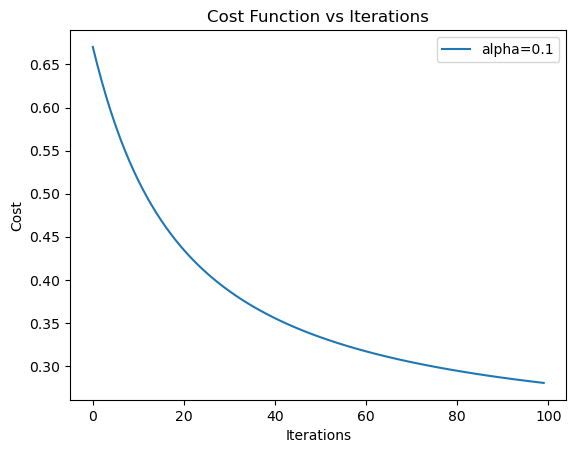

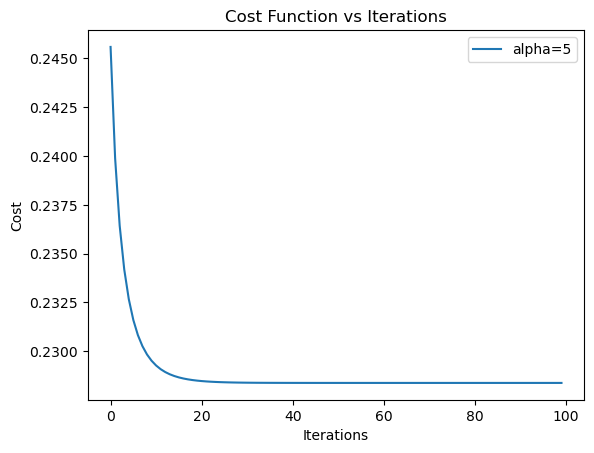

In [24]:
log_reg_01.plot_cost_function(cost_history_01[:100], label='alpha=0.1')
log_reg_5.plot_cost_function(cost_history_5, label='alpha=5')

##### Plot decision boundary

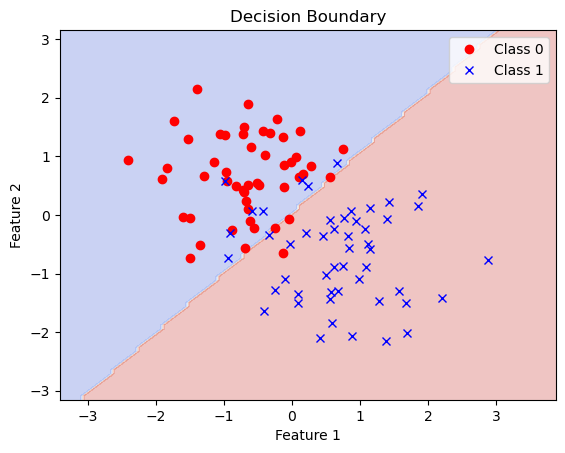

In [26]:
log_reg_01.plot_decision_boundary(X, y)

##### Predictions

In [28]:
y_pred = log_reg_01.predict(x_test)

##### Compute metrics and print confusion matrix

Confusion Matrix:


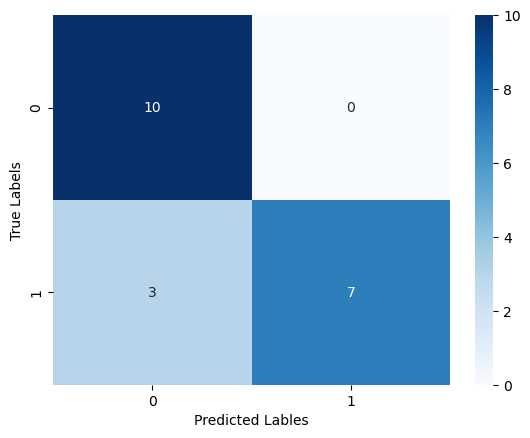

Accuracy: 0.8500, Precision: 1.0000, Recall: 0.7000, F1-Score: 0.8235


In [54]:
cm, accuracy, precision, recall, f1_score = log_reg_01.compute_metrics(y_test, y_pred)

print("Confusion Matrix:")
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted Lables')
plt.ylabel('True Labels')
plt.show()
print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}')
